# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
print("Plans:")
plans.head()

Plans:


,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
print("Users:")
users.head()

Users:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
print("Usage:")
usage.head()

Usage:


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans shape:", plans.shape)
print("users shape:", users.shape)
print("usage shape:", usage.shape)

plans shape: (2, 8)
users shape: (4000, 8)
usage shape: (40000, 6)


In [7]:
# inspección de plans con .info()
print("\nPlans info:")
plans.info()


Plans info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
print("\nUsers info:")
users.info()


Users info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
print("\nUsage info:")
usage.info()


Usage info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print("Cantidad de valores nulos en users:")
print(users.isna().sum())

# Proporción de valores nulos)
print("\nProporción de valores nulos en users:")
print(users.isna().mean())
    

Cantidad de valores nulos en users:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de valores nulos en users:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print("Cantidad de valores nulos en usage:")
print(usage.isna().sum())

# Proporción de valores nulos
print("\nProporción de valores nulos en usage:")
print(usage.isna().mean())

Cantidad de valores nulos en usage:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de valores nulos en usage:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

INSIGHTS DERIVADOS DEL ANÁLISIS:

Valores en Users:

* Columna "City" tiene una proporción de nulos del 11.7%, lo que representa un porcentaje moderado de valores faltantes y requiere investigar para decidir si imputar o dejar esos valores como nulos.
* Columna "Churn date" (Cancelación del servicio) tiene una proporción de nulos del 88.3% lo que representa un valor muy alto de nulos. Esto hace pensar que la fecha debería ignorarse o eliminarse.
* Resto de las columnas: La proporción de nulos es 0% lo que habla a simple vista de datos completos y consistentes, por lo que no se require labor de investigación adicional.

Valores en Usage:

* Columna "date": Exhibe una proporción de nulos del 0.1% lo que habla de un porcentaje muy bajo de valores faltantes, por lo que se puede imputar o mantener los nulos ya que el impacto es mínimo sobre la data total.
* Columna "duration": Tiene una proporción alta de nulos (55.2%), lo que puede deberse a un error durante la captura de los datos o donde la duración no aplica. Aquí debería investigarse el significado del nulo o eliminarla del análisis.
* Columna "length": Tiene también una alta proporción de nulos, por lo que se recomienda no imputar directamente.
* Resto de las columnas: Presentan a simple vista datos consistentes,por lo que no se require acción adicional.


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
users_num = users.select_dtypes(include='number')

# Resumen estadístico
users_num.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` No hay valores nulos, el número va de 10000 a 13999. Por la naturaleza de la columna promedio y percentil no tienen significado o valor analítico.
- La columna `age` tiene un valor mínimo que no es lógico (-999), por lo que no es un dato real sino un sentinel y se sugiere reemplazar ese número por NaN. No osbtante, el máximo luce razonable. La mayoría de las edades oscilan entre 32 y 63, lo que de nuevo parace ser razonable y la desviación estándar es muy alta, lo que señala presencia de valores extremos.

In [13]:
# explorar columnas numéricas de usage
usage_num = usage.select_dtypes(include='number')

# Resumen estadístico
usage_num.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- La columna "id" tiene valores que se mueven entre 100000 y 400000 sin valores nulos y por la naturaleza de la columna la media y percentiles no tienen valor analítico.
- La columna "user_id" tiene valores consistentes entre 10000 y 13999 sin valores nulos.

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

for col in columnas_user:
    print(f"\nColumna: {col}")
    print("Valores únicos:")
    print(users[col].unique())
    
    print("\nConteo de valores:")
    print(users[col].value_counts(dropna=False))



Columna: city
Valores únicos:
['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']

Conteo de valores:
Bogotá      808
CDMX        730
Medellín    616
NaN         469
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

Columna: plan
Valores únicos:
['Basico' 'Premium']

Conteo de valores:
Basico     2595
Premium    1405
Name: plan, dtype: int64


- La columna `city` exhibe 7 ciudades válidas para análisis y los 469 valores nulos que ya se evidenciaron cuando exploramos los valores nulos de users. También hay una ciudad que aparece con el signo "?" y representa 96 registros, por lo que ese valor es un sentinel y junto con los 469 valores nulos indica que hay unas 565 celdas en la base de datos en los que la ciudad es desconocida. Esto sugiere la necesidad de reemplazar "?" por NaN para unificar valores faltantes. En general, las ciudades que sí están identificadas tienen suficiente representación para análisis.
- La columna `plan` no evidencia valores nulos sino dos categorías: "Básico" y "Premium", por lo que parece ser buena para incluirla en el análisis.

In [15]:
# explorar columna categórica de usage
usage['type'] # completa el código

print("Valores únicos:")
print(usage['type'].unique())

print("\nConteo de valores:")
print(usage['type'].value_counts(dropna=False))

Valores únicos:
['call' 'text']

Conteo de valores:
text    22092
call    17908
Name: type, dtype: int64


- La columna `type` no exhibe valores nulos, sentinels o valores inválidos y sólo existen dos categorías "text" y "Call" y aunque hay una ligero desbalance entre uno y otro, el valor no sorprende, por la naturaleza de los datos (es esperable que el número de textos sea superior al de llamadas). Además ambas categorías exhiben suficientes números para un buen análisis sin requerir limpieza adcional.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:

# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users[['reg_date']].head()

,reg_date
0,2022-01-01 00:00:00.000000000
1,2022-01-01 06:34:17.914478619
2,2022-01-01 13:08:35.828957239
3,2022-01-01 19:42:53.743435858
4,2022-01-02 02:17:11.657914478


In [17]:

# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')
usage[['date']].head()

,date
0,2024-01-01 00:00:00.000000000
1,2024-01-01 00:06:30.969774244
2,2024-01-01 00:13:01.939548488
3,2024-01-01 00:19:32.909322733
4,2024-01-01 00:26:03.879096977


In [18]:

# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()


2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date`, la mayoría de los datos están concentrados entre 2022 y 2024, lo cual es suficiente para cubrir el período de análisis que nos pide el ejercicio y la distribución principal durante esos años parece ser balanceada y suficiente para hacer un análisis.

In [19]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()

2024.0    39950
Name: date, dtype: int64

En `date`, se puede observar que los registros para 2024 son válidos y que además la columna date está correctamente estandarizada, por lo que la información está lista para analizar.

Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

No aparecen años imposibles y la información mostrada es balanceada y lógica. No obstante, aparecen 40 records de 2026, información que excede el rango esperado, por lo que habría que validar si se trata de errores puntuales en la captura o carga de datos. En caso de que dicha acción no pueda realizarse, estos valores deberían ser tratados como valores inválidos.


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].value_counts(dropna=False)

Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [22]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
# Separar los datos por tipo
calls = usage[usage['type'] == 'call']
texts = usage[usage['type'] == 'text']

# Calcular proporción de valores nulos en duration
calls_duration_nulos = calls['duration'].isna().mean()
texts_duration_nulos = texts['duration'].isna().mean()

# Mostrar resultados
print("Proporción de nulos en duration:")
print("call :", calls_duration_nulos)
print("text :", texts_duration_nulos)

Proporción de nulos en duration:
call : 0.0
text : 0.9992757559297484


In [24]:
# Verificación MAR en usage (Missing At Random) para length
# Calcular proporción de valores nulos en length
calls_length_nulos = calls['length'].isna().mean()
texts_length_nulos = texts['length'].isna().mean()

# Mostrar resultados
print("Proporción de nulos en length:")
print("call :", calls_length_nulos)
print("text :", texts_length_nulos)

Proporción de nulos en length:
call : 0.9993299084208175
text : 0.0


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Diagnóstico de "duration": Esta columna presenta valores nulos casi exclusivamente en los registros de tipo text, lo cual es esperanble porque los mensajes de texto no tienen duración. En tal sentido, podemos concluir que los valores nulos en texto, dependen del tipo de registro (Type), por lo que se consideran Missing at random, pues el patrón no es 100% aleatorio ya que depende de otra variable. En tal sentido, lo recomendable es no imputarlos ya que representan una información válida (No aplica).

Diagnóstico de "Length": La columna length muestra valores nulos casi exclusivamente para el tipo de registro "Call", lo cual también es lógico, pues las llamadas no tienen longitud de texto. En tal sentido, como los valores nulos nuevamente dependen de type, estamos ante otro caso de Missing at Random y en este caso, tampoco conviene imputarlos porque proporcionan información válida.


---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = (
    usage
    .groupby("user_id")
    .agg(
        cant_mensajes=("is_text", "sum"),
        cant_llamadas=("is_call", "sum"),
        cant_minutos_llamada=("duration", "sum")
    )
    .reset_index()
)

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
# Columnas numéricas relevantes
columnas_numericas = [
    'age',
    'cant_mensajes',
    'cant_llamadas',
    'cant_minutos_llamada'
]

#Resumen estadístico
user_profile[columnas_numericas].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [29]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

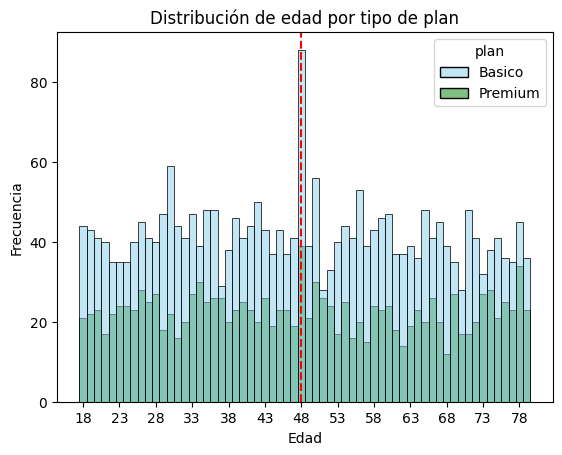

In [30]:
# Histograma para visualizar la edad (age)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tomamos las edades
edades = user_profile['age']
min_age = edades.min()
max_age = edades.max()

# Histograma: una barra por cada edad exacta
bins = np.arange(min_age, max_age + 2) - 0.5  # centrado en enteros

sns.histplot(
    data=user_profile,
    x='age',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=bins,
    kde=False
)

# Mostrar ticks en el eje X cada 5 años
plt.xticks(np.arange(min_age, max_age + 1, 5))

# Encontrar la(s) edad(es) con mayor frecuencia (moda)
frecuencias = edades.value_counts()
moda = frecuencias[frecuencias == frecuencias.max()].index.tolist()

# Investigación hecha para aprender a marcar la edad de moda con línea vertical roja
for m in moda:
    plt.axvline(x=m, color='red', linestyle='--', label=f'Moda: {m}')

# Títulos y etiquetas
plt.title('Distribución de edad por tipo de plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

💡Insights: 
- Distribución de edad por tipo de plan:
- La distribución de edades luce bastante uniforme entre los 18 y 80 años (que es el rango de edades en estudio), con ligeras excepciones observadas en los rangos cercanos a los 36 años, los 51 y los 70 años, pero nada que resalte abruptamente.
- No se observa una concentración extrema marcada por un rango de edad joven o mayor, por lo que la edad no parece ser un factor determinante ni en el consumo de los planes ni en la frecuencia del uso.
- El plan basico tiene mayor frecuencia que el plan premium (probablemente porque hay más usuarios en ese plan)
- Tanto en el plan pago como en el premium las personas que más compran planes tienen entre 48 y 50 años.
- En conclusión: La edad no parece ser un factor determinante en la frecuencia del uso de planes, por lo que las campañas de marketing no deberían segmentarse por edad y el upgrade a planes premium puede ofrecerse transversalmente.

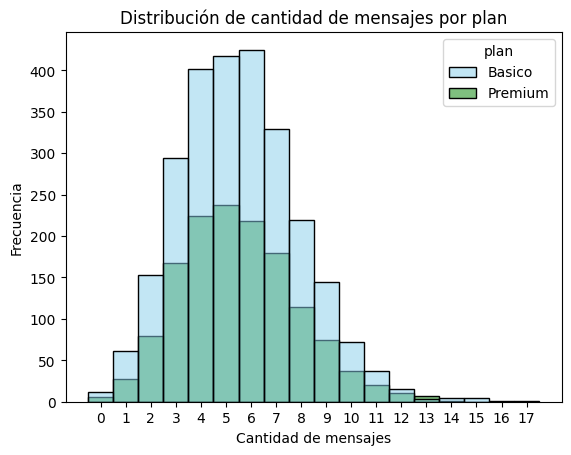

In [31]:
# Histograma para visualizar la cant_mensajes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Datos
mensajes = user_profile['cant_mensajes']
min_msg = mensajes.min()
max_msg = mensajes.max()

# Histograma
bins_msg = np.arange(min_msg, max_msg + 2) - 0.5  # centrado en enteros

sns.histplot(
    data=user_profile,
    x='cant_mensajes',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=bins_msg,
    kde=False
)

# Ticks cada 5 o 10 mensajes
plt.xticks(np.arange(min_msg, max_msg + 1, max(1, (max_msg-min_msg)//10)))

plt.title('Distribución de cantidad de mensajes por plan')
plt.xlabel('Cantidad de mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights para distribución de cantidad de mensajes por plan: 
- Distribución con forma de campana en la que se observa una mayor concentración entre los 4 y 7 mensajes en ambos planes.
- Se observa una cola larga hacia la derecha, lo que indica pocos usuarios estirando la distribución al usar muchos mensajes.
- El plan básico domina en frecuencias bajas y medias.
- Usuarios básicos con alto uso de mensajes son buenos candidatos para migrar al plan premium, por lo que se puede considerar una campaña de marketing para ofrecer upgrades a esos usuarios.
- Se pueden diseñar planes con beneficios progresivos para aquellos usuarios que envíen mayor número de mensajes (sean básicos o premium).

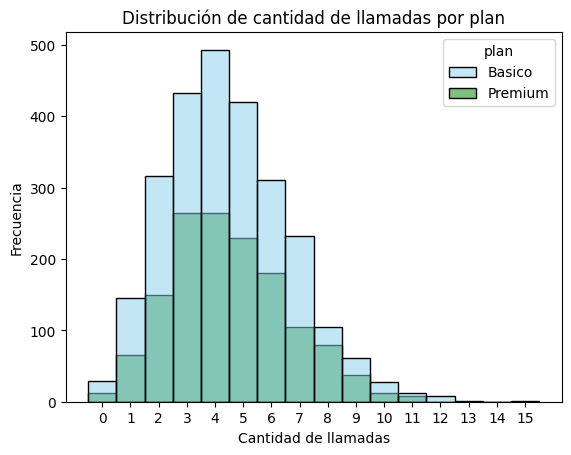

In [32]:
# Histograma para visualizar la cant_llamadas
llamadas = user_profile['cant_llamadas']
min_ll = llamadas.min()
max_ll = llamadas.max()

bins_ll = np.arange(min_ll, max_ll + 2) - 0.5  # centrado en enteros

sns.histplot(
    data=user_profile,
    x='cant_llamadas',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=bins_ll,
    kde=False
)

plt.xticks(np.arange(min_ll, max_ll + 1, max(1, (max_ll-min_ll)//10)))

plt.title('Distribución de cantidad de llamadas por plan')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights para distribución de cantidad de llamadas por plan: 
- Distribución en forma de campana con cola hacia la derecha, lo que indica que la mayoría de los usuarios (en ambos planes) hacen pocas llamadas, pero hay pocos usuarios en ambos planes que estiran la distribución hacia valores altos, pues aunque son pocos, pero hacen muchas llamadas.
- La mayoría de los usuarios en ambos planes realiza entre 2 y 6 llamadas.
- Muy pocos usuarios de ambos planes superan las 10 llamadas.
- Los usuarios que tienen más llamadas despues de las 10 son usuarios básicos, a quienes podría ofrecérseles un plan premium.
- En conclusión, la cantidad de llamadas puede ser un buen indicador de segmentación. Esto puede ayudar a para migrar personas del plan básico al premium, pues los usuarios con mayor número de llamadas generan mayor carga operativa, por lo deberían eventualmente migrarse a planes pagos. Quizás un trigger de upgrade automático puede funcionar para estos casos.

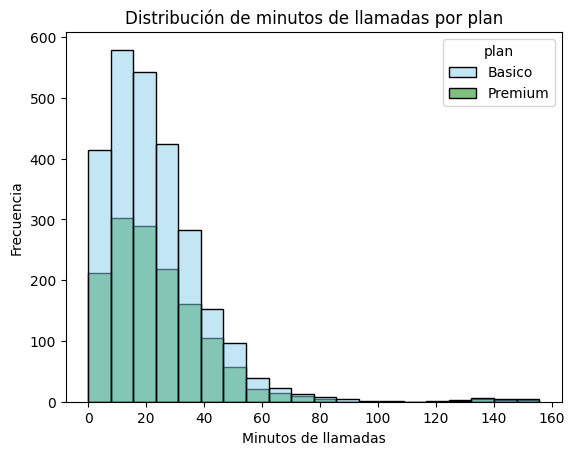

In [33]:
# Histograma para visualizar la cant_minutos_llamada
minutos = user_profile['cant_minutos_llamada']
min_min = int(minutos.min())
max_min = int(minutos.max())

# Para minutos, podemos usar 20 bins automáticos (puede ser continuo)
bins_min = 20

sns.histplot(
    data=user_profile,
    x='cant_minutos_llamada',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=bins_min,
    kde=False
)

plt.title('Distribución de minutos de llamadas por plan')
plt.xlabel('Minutos de llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights para distribución de minutos de llamadas por plan: 
- Distribución fuertemente sesgada hacia la derecha, lo que habla de pocos usuarios estirando la cola del gráfico al hacer llamadas largas.
- La mayoría de los usuarios de ambos planes hacen llamadas que no superan los 40 minutos, habiendo una mayor concentración entre los 10 y 20 minutos.
- Existen outliers claros (por encima de los 100 minutos) y todos ellos parecen ser usuarios premium haciendo uso de los beneficios que les confiere su plan.
- Los usuarios básicos parecen estar concentrados en consumos por debajo de los 40 minutos, por lo que usuarios por encima de ese tiempo pudieran ser evaluados para un upgrade, en vista de que usuarios con alto consumo de minutos resultan costosos en un plan básico.
- Deben considerarse incentivos para aquellos usuarios premium que producen llamadas de larga duración.
- Podría establecerse un límite a partir del cual un usuario básico pueda ser considerado para un plan premium y fijar alertas para que el equipo de marketing ofrezca promociones a partir de ese número. Lo mismo podría aplicar para un plan premium pero con incentivos.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

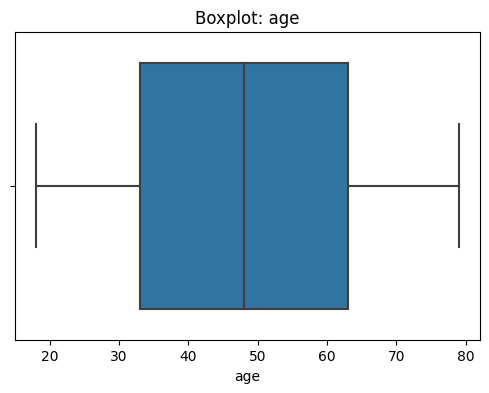

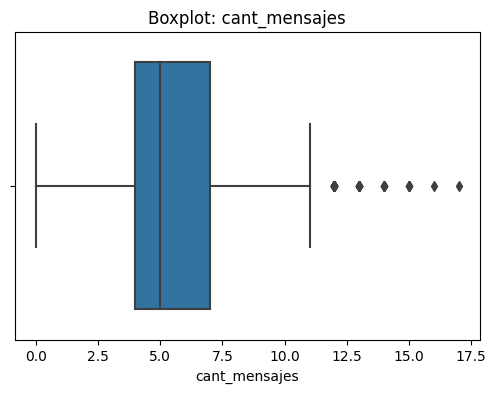

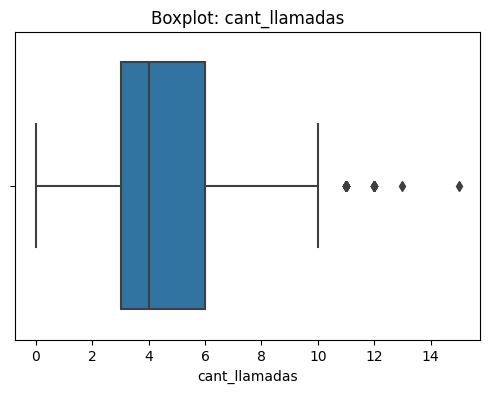

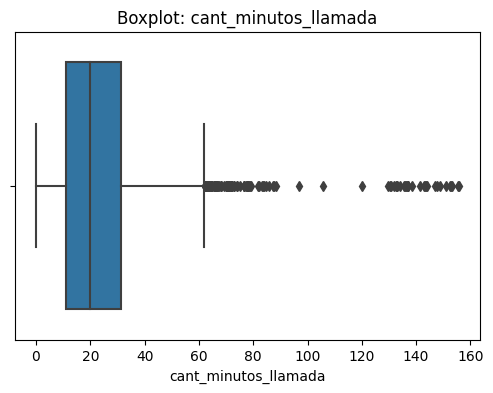

In [34]:
# Visualizando usando BoxPlot 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=user_profile[col])
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

💡Insights: 
- Age: No presenta outliers.
- cant_mensajes: Presenta outliers que oscilan entre los 12.5 y los 17.5 mensajes.
- cant_llamadas: Presenta outliers que hablan de usuarios haciendo llamadas superiores a 10 y por encima de 14.
- cant_minutos_llamada: Se presentan outliers que representan usuarios haciendo llamadas superiores a los 60 minutos y hasta los 160 minutos.

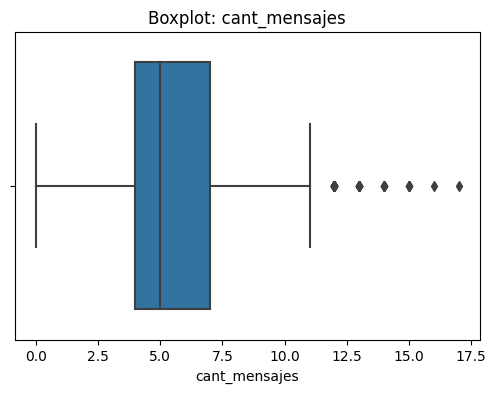

Variable: cant_mensajes
Q1: 4.00
Q3: 7.00
IQR: 3.00
Límite superior: 11.50
Cantidad de outliers superiores: 46


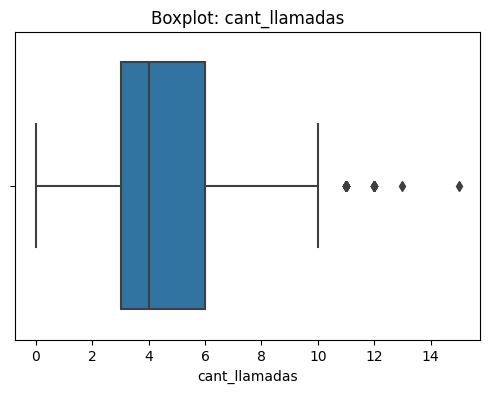

Variable: cant_llamadas
Q1: 3.00
Q3: 6.00
IQR: 3.00
Límite superior: 10.50
Cantidad de outliers superiores: 30


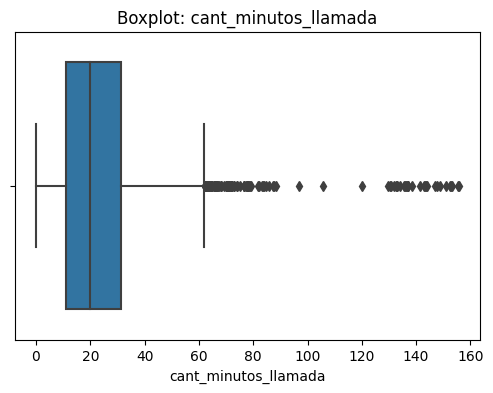

Variable: cant_minutos_llamada
Q1: 11.12
Q3: 31.41
IQR: 20.30
Límite superior: 61.86
Cantidad de outliers superiores: 109


In [35]:
# Calcular límites con el método IQR
import matplotlib.pyplot as plt
import seaborn as sns

columnas_limites = [
    'cant_mensajes',
    'cant_llamadas',
    'cant_minutos_llamada'
]

for col in columnas_limites:
    
    # -------- BOXPLOT --------
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=user_profile[col])
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()
    
    # -------- CÁLCULO DEL IQR --------
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    # Como los outliers están solo a la derecha,
    # calculamos únicamente el límite superior
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers superiores
    outliers_superiores = user_profile[user_profile[col] > limite_superior]

    # -------- RESULTADOS --------
    print(f'Variable: {col}')
    print(f'Q1: {Q1:.2f}')
    print(f'Q3: {Q3:.2f}')
    print(f'IQR: {IQR:.2f}')
    print(f'Límite superior: {limite_superior:.2f}')
    print(f'Cantidad de outliers superiores: {len(outliers_superiores)}')


In [36]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 


Al comparar los máximos y mínimos obtenidos con los valores proporcionados por los boxplots observamos que: 

- cant_mensajes: El Q3 da un valor de 7 y el límite superior es de 11.5, que es el valor a partir del cual estadísticamente se ubican los outliers, considerando que el número máximo de datos es 17, la diferencia entre este límite y el máximo es moderada y no extrema. Adicionalmente, se observan 46 outliers para esta variable, lo cual no resulta descabellado, ya que es normal que exista un grupo de usuarios que envíe más mensajes que el promedio. En vista de que los números observados no son ni ilógicos ni incosistentes, sino que simplemente corresponden a usuarios con alto nivel de  uso, estos outliers deben MANTENERSE, pues reflejan un comportamiento real del mercado.
  
- cant_llamadas: El Q3 para esta variable es de 6 y el límite superior es de 10.5. Al compararlo con el máximo observado (15) no se detectan valores anómalos o desproporcionados. En cambio, estos outliers hablan de usuarios que realizan más llamadas de lo habitual y pueden resultar relevantes para análisis de segmentación y monetización. Por eso deberíamos MANTENER esos outliers.

  
- cant_minutos_llamada: El Q3 para esta variable es de 31.41 y el límite superior es de 61.86, mientras que el máximo observado en esta variable es de 155.69.Esta diferencia considerable entre el límite IQR y el valor máximo indica una alta dispersión en la cola derecha, lo que sugiere un grupo reducido de usuarios que consume significativamente más que el promedio. Este comportamiento no se considera anómalo, sino esperable dentro de un reducido grupo de usuarios, por lo que eliminarlos podría distorsionar el análisis. Por esta razón se recomienda MANTENER estos outliers. No obstante, en vista de que este pequeño grupo representa características especiales con potencial valor comercial, se recomienda estudiarlos por separado, a través de métricas más robustas como la mediana, percentiles (para entender mejor cómo se reparte el consumo entre estos usuarios) y rango intercuartílico (para conocer más al usuario típico de este segmento).


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [37]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = 'Alto uso'  # valor por defecto

user_profile.loc[
    (user_profile['cant_llamadas'] < 5) &
    (user_profile['cant_mensajes'] < 5),
    'grupo_uso'
] = 'Bajo uso'

user_profile.loc[
    (user_profile['cant_llamadas'] < 10) &
    (user_profile['cant_mensajes'] < 10),
    'grupo_uso'
] = 'Uso medio'

In [38]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Uso medio


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [39]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = 'Adulto Mayor'  # valor por defecto

user_profile.loc[
    user_profile['age'] < 30,
    'grupo_edad'
] = 'Joven'

user_profile.loc[
    user_profile['age'] < 60,
    'grupo_edad'
] = 'Adulto'


In [40]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Uso medio,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

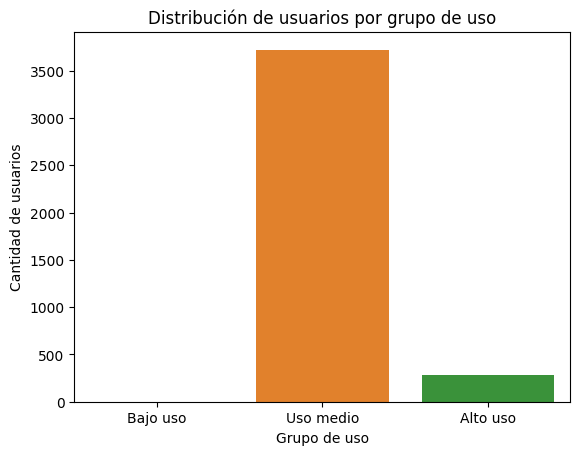

In [43]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la columna grupo_uso
user_profile['grupo_uso'] = 'Alto uso'

user_profile.loc[
    (user_profile['cant_llamadas'] < 5) &
    (user_profile['cant_mensajes'] < 5),
    'grupo_uso'
] = 'Bajo uso'

user_profile.loc[
    (user_profile['cant_llamadas'] < 10) &
    (user_profile['cant_mensajes'] < 10),
    'grupo_uso'
] = 'Uso medio'


# 2. Visualización de los segmentos por uso

sns.countplot(
    data=user_profile,
    x='grupo_uso',
    order=['Bajo uso', 'Uso medio', 'Alto uso']
)

plt.title('Distribución de usuarios por grupo de uso')
plt.xlabel('Grupo de uso')
plt.ylabel('Cantidad de usuarios')
plt.show()



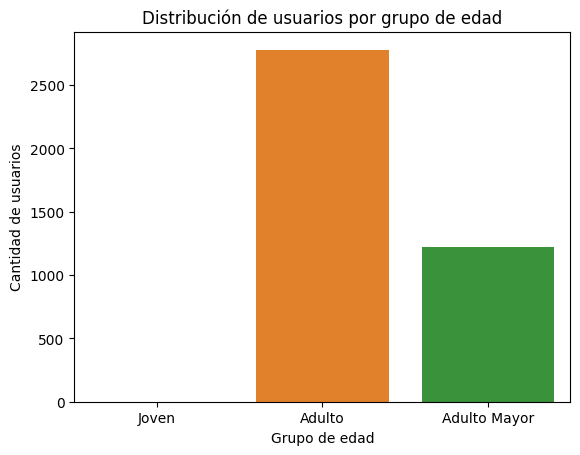

In [45]:
# Visualización de los segmentos por edad

user_profile['grupo_edad'] = 'Adulto Mayor'

user_profile.loc[user_profile['age'] < 30, 'grupo_edad'] = 'Joven'
user_profile.loc[user_profile['age'] < 60, 'grupo_edad'] = 'Adulto'

sns.countplot(
    data=user_profile,
    x='grupo_edad',
    order=['Joven', 'Adulto', 'Adulto Mayor']
)

plt.title('Distribución de usuarios por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

Operando en 2 mercados altamente competitivos -México y Colombia- la empresa de telecomunicaciones ConnectaTel necesita entender con precisión cómo sus clientes usan realmente sus planes, pues esta información es vital para aprovechar oportunidades de negocio que puedan estar actualmente escondidas. Para acercarse a esta comprensión, el equipo de análisis de datos partió de una pregunta simple pero poderosa ¿Nuestos planes actuales reflejan el comportamiento real de nuestros clientes?.

Para responder a esta pregunta se integraron y analizaron tres fuentes clave: planes contratados, perfil de clientes y uso real de llamadas y mensajes. El resultado no es solo una base limpia y confiable, sino una visión clara de dónde están las oportunidades comerciales que hoy no se están explotando del todo.

1. Asegurar una base confiable:

Se detectaron problemas típicos de operación real (sin problemas graves), por lo que tras la limpieza y estandarización de los datos, estos son confiables para obtener insights valiosos.

* Información incompleta en ciudad (11.7% de los registros) y fechas de cancelación mayoritariamente vacías (88.3%), lo que limita análisis geográficos y de churn.

* Valores sentinels como edades inválidas (-999) o ciudades marcadas con "?", que ocultaban información faltante.

* Nulos “aparentes” en duración y longitud de uso que, lejos de ser errores, reflejan correctamente la lógica del negocio (mensajes no tienen duración y llamadas no tienen texto).

2. ¿La edad explica el consumo? Sorprendentemente, no

Tras un análisis minucioso en variables válidas, se observó que segmentar campañas por edad puede tener un impacto limitado y que el verdadero elemento diferenciador está en cómo se usa el servicio.

* El consumo está distribuido de forma bastante uniforme entre los 18 y 80 años.

* No hay grupos etarios que concentren de forma clara el uso intensivo.

* Tanto en plan básico como premium, los rangos más frecuentes de contratación rondan los 48–50 años, pero sin diferencias significativas de uso.

3. El verdadero factor clave: nivel de uso

* Bajo uso: La mayoría de los clientes. Uso moderado, costos controlados y bajo riesgo operativo. Aportan estabilidad, pero poco crecimiento incremental.

* Uso medio: El corazón del negocio. Clientes sensibles a promociones, mejoras graduales y bundles. Aquí se concentra el mayor potencial de optimización de oferta.

* Alto uso (menos de 500 usuarios): Un grupo pequeño, pero crítico porque

* Generan colas largas en mensajes, llamadas y minutos.
* Incluyen usuarios básicos que ya consumen como premium.
* Incluyen usuarios premium que utilizan intensivamente los beneficios del plan.


4. ¿Qué oportunidades aparecen al conectar todo?

Cuando se conectan datos, segmentos y patrones, la historia se vuelve clara:

* Existen usuarios básicos con comportamiento premium.
* Existen usuarios premium intensivos que merecen incentivos para retención.
* El uso real permite diseñar triggers automáticos de upgrade, en lugar de campañas genéricas.
* La oferta actual puede ajustarse mejor a la realidad con planes intermedios, add-ons o beneficios progresivos.

5. Recomendaciones estratégicas

* Migración inteligente de planes
    * Activar alertas automáticas cuando un usuario básico supere ciertos umbrales de uso.
    * Ofrecer upgrades personalizados basados en comportamiento, no en demografía.
* Rediseño de la oferta
    * Crear planes intermedios o add-ons para usuarios de uso medio-alto.
    * Introducir beneficios escalonados que acompañen el crecimiento del consumo.
      
* Gestión diferenciada del alto uso
    * Tratar este grupo como un segmento premium estratégico.
    * Medirlo con percentiles y medianas para entender su valor real.
    * Diseñar incentivos específicos de retención y fidelización.

* Mejora continua de datos
    * Corregir capturas de ciudad y fechas clave para habilitar análisis futuros de churn y regionalización.

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Información incompleta en variables relevantes: City presenta un 11.7% de valores faltantes, que junto con el sentinel "?" representa aproximadamente 565 registros con ciudad desconocida. Esto limita análisis geográficos detallados y evidencia oportunidades de mejora en la captura de datos.
- Variables con alta proporción de nulos sin valor analítico: La columna Churn date tiene un 88.3% de valores nulos, lo que sugiere que no es una variable confiable para análisis de cancelación y debe ser descartada o redefinida.
- Valores inválidos y sentinels Se identificaron valores no lógicos en age (ej. -999) y en city ("?"), que fueron tratados como valores faltantes para evitar distorsiones en el análisis.
- Nulos dependientes del tipo de uso: Las columnas duration y length presentan altos porcentajes de nulos, pero estos dependen del campo type (mensajes vs. llamadas), por lo que representan información válida y no errores de calidad.
- Fechas fuera del rango esperado: Se detectaron registros aislados con fechas en 2026 (≈40 filas), que exceden el período de análisis y deben validarse o excluirse.

🔍 **Segmentos por Edad**
- La distribución de edades es amplia y homogénea entre los 18 y 80 años, sin concentraciones extremas.
- No se observan diferencias relevantes de uso entre usuarios jóvenes, adultos y adultos mayores.
- Tanto en planes básicos como premium, la mayor frecuencia de contratación se encuentra alrededor de los 48–50 años.
- El segmento de adultos mayores es reducido (<1,500 usuarios) y no presenta patrones de uso extremo.
- Se evidencia que la edad no es un factor determinante del consumo.

📊 **Segmentos por Nivel de Uso**
- Bajo uso: Representa la mayoría de los clientes. Uso estable, bajo costo operativo y bajo potencial inmediato de monetización adicional.
- Uso medio: Segmento más numeroso y balanceado. Usuarios con comportamiento predecible, sensibles a promociones y ajustes graduales de la oferta.
- Also uso: Segmento pequeño (<500 usuarios), pero con impacto significativo:
  * Presenta outliers en mensajes, llamadas y minutos.
  * Incluye usuarios básicos con consumo cercano o superior a niveles premium.
  * Incluye usuarios premium que hacen uso intensivo de los beneficios del plan.

**Esto sugiere que**

* Existe un desajuste entre el plan contratado y el uso real de una parte de los clientes.
* Los outliers detectados no son errores, sino usuarios con necesidades diferenciadas.
* Un pequeño grupo de usuarios genera una proporción desmedida del consumo y de la carga operativa.
* ConnectaTel tiene oportunidades claras de incrementar ingresos y optimizar costos si gestiona activamente estos segmentos.

💡 **Recomendaciones**
- Activar upgrades basados en comportamiento:
    * Implementar triggers automáticos para ofrecer planes premium a usuarios básicos que superen umbrales de llamadas o minutos.
    * Priorizar campañas dirigidas a usuarios de alto uso en lugar de campañas masivas.
- Optimizar y diversificar la oferta
    * Diseñar planes intermedios o add-ons para usuarios de uso medio-alto.
    * Crear beneficios progresivos que acompañen el crecimiento del consumo.
- Gestionar estratégicamente el segmento de alto uso:
    * Analizarlo como un grupo diferenciado usando percentiles y medianas.
    * Ofrecer incentivos de fidelización a usuarios premium intensivos.
- Mejorar la calidad del dato
    * Fortalecer la captura de ciudad y fechas clave para habilitar análisis futuros más avanzados (churn, regionalización, lifetime value).

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`